In [2]:
import numpy as np
import glob
import json
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
#Load experiment and get df
def load_expt_result(all_exp_fname):
    all_exp_json = []
    for fname in all_exp_fname:
        with open(fname,"r") as rhandle:
            exp_json = json.load(rhandle)
            clean_exp_json = {key:val for key,val in exp_json["config"].items()}
            clean_exp_json = clean_exp_json | {key:val for key,val in exp_json["metrics_tline"].items()}
            
            all_exp_json.append(clean_exp_json)
    
    #Now creating the experiment dataframe
    exp_df = pd.DataFrame(all_exp_json)
    exp_df["pval"]=pd.Series({idx:exp_df.iloc[idx]["topic_corr_list"][-1] for idx in range(exp_df.shape[0])})
    return exp_df

In [4]:
all_exp_fname=glob.glob("dataset/nlp_toy2/*.json")
exp_df = load_expt_result(all_exp_fname)
exp_df["pval"]

0      0.80
1      0.90
2      0.90
3      0.90
4      0.70
       ... 
170    0.99
171    0.99
172    0.99
173    0.99
174    0.70
Name: pval, Length: 175, dtype: float64

## Plot Utilities

In [5]:
def plot_one_setting(exp_df,sample,pos_size,noise,inv_idx_list,pval_list,ax):
    #Getting the slice of the dataframe
    df_slice = exp_df[
                        (exp_df["num_sample"]==sample) & (exp_df["num_pos_sample"]==pos_size) & (exp_df["noise_ratio"]==noise) 
                ]
    
    
#     color=["r","b"]
    
    #Now we will plot the main accuracy for all the pval and inv
    for inv_idx in inv_idx_list:
        #Make pval as the key
        df_idx_slice = df_slice[(df_slice["inv_idx"]==inv_idx)]
        df_idx_slice.set_index("pval",inplace=True)
#         print(df_idx_slice.head())
        
        #Getting the accuarcy
        acc_list = [df_idx_slice.loc[pval]["main_vacc"][-1] for pval in pval_list]
        
        ax.plot(pval_list,acc_list,marker="o",ls="-.",label="inv_idx={}".format(inv_idx))
        ax.set_xlabel("p-val [0.5,1]")
        ax.set_ylabel("Main Task Validation Accuracy")
        
        ax.legend()
        ax.grid(True)
        ax.set_title("noise={}".format(noise))
        ax.set_ylim(0,1.1)
    
    return ax

def plot_one_noise_plate(exp_df,sample,pos_size,noise_list,inv_idx_list,pval_list):
    fig,ax = plt.subplots(1,len(noise_list))
    for nidx,noise in enumerate(noise_list):
        plot_one_setting(exp_df,sample,pos_size,noise,inv_idx_list,pval_list,ax[nidx])
    
    plt.show()

    

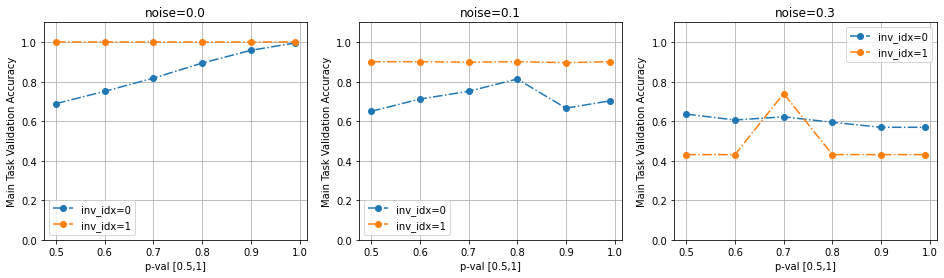

In [8]:
plt.rcParams['figure.figsize'] = [16, 4]
plot_one_noise_plate(exp_df=exp_df,
                     sample=1000,
                     pos_size=20,
                     noise_list=[0.0,0.1,0.3],
                     inv_idx_list=[0,1],
                     pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
)